# The following code implements Algorithm 2 LinearRegressionGradientDescent Page 32 of Gerald Friedland: "Information-Driven Machine Learning", Springer-Nature, 2023.

## https://link.springer.com/book/10.1007/978-3-031-39477-5

### The code is written by Neil Patel and released into public domain for demonstration purposes only, use at your own risk.  I appreciate a citation of this repository or the book, whatever fits best.

### A simple implementation of linear regression using gradient descent

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def linear_regression_gradient_descent(X, y, alpha, epsilon):
    # Add a column of ones to X for bias
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Initialize coefficients to random values
    beta = np.random.rand(X_bias.shape[1])
    
    # Compute mean squared error loss using initial coefficients
    J = np.mean((np.dot(X_bias, beta) - y) ** 2)
    
    # Gradient Descent loop
    while True:
        # Update coefficients
        beta -= alpha * (1 / X_bias.shape[0]) * np.dot(X_bias.T, np.dot(X_bias, beta) - y)
        
        # Compute mean squared error loss using updated coefficients
        J_new = np.mean((np.dot(X_bias, beta) - y) ** 2)
        
        # Check convergence
        if np.abs(J_new - J) < epsilon:
            break
        
        # Update loss
        J = J_new
    
    return beta



In [5]:
# Generates our data based on a polynomial

def generate_data_polynomial(n, degree, noise_std):
    # Generate random data points
    X = np.random.rand(n)
    
    # Generate polynomial features
    X_poly = np.array([X**d for d in range(1, degree+1)]).T
    
    # Generate target values based on a polynomial function plus noise
    y = np.sum(X_poly, axis=1) + np.random.normal(scale=noise_std, size=n)
    
    return X, y


In [6]:
# Ask user for degree of polynomial
degree = int(input("Enter the degree of polynomial: "))
X, y = generate_data_polynomial(100, degree, 0.1)

In [7]:
# Set hyperparameters
alpha = 0.01
epsilon = 1e-5

In [8]:

# Perform linear regression using gradient descent
coefficients = linear_regression_gradient_descent(X, y, alpha, epsilon)
print("Coefficients:", coefficients)

Coefficients: [0.04878378 1.56176744]


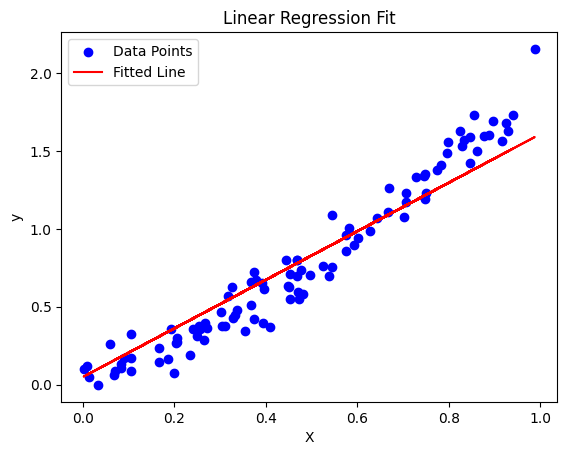

In [9]:
# Visualization
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, coefficients[0] + coefficients[1] * X, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()